In [1]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as pl
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def line(a, b, x):
    y = a * x + b
    err = np.random.randn(len(x)) * np.sqrt(y).mean()
    return y + err

In [3]:
x = np.random.rand(10) * 10

In [4]:
y = line(10, 5, x)

In [5]:
df_line = pd.DataFrame({'y': y, 'x': x})
df_line.head()

,x,y
0,4.097084,39.957854
1,1.221488,18.795761
2,2.030101,31.830380
3,9.736231,109.146324
4,7.141747,84.117394


In [6]:
lm1 = smf.ols(formula='y ~ x', data=df_line).fit()
lm1.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     377.2
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           5.13e-08
Time:                        11:08:30   Log-Likelihood:                -30.033
No. Observations:                  10   AIC:                             64.07
Df Residuals:                       8   BIC:                             64.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.4395      3.322      1.939      0.089        -1.221    14.100
x             10.4042      0.536     19.423      0.000         9.169    11.639
==============================================================================
Omnibus:                        3.008   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                1.565
Skew:                          -0.957   Prob(JB):                        0.457
Kurtosis:                       2.690   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

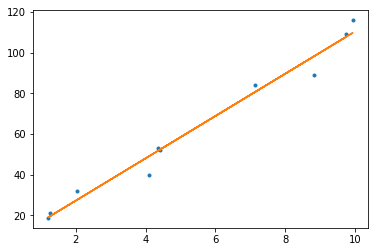

In [7]:
pl.plot(x, y, '.')
pl.plot(x, lm1.predict())

In [8]:
## I() is the identity matrix

lm2 = smf.ols(formula='y ~ I(x**2) + x', data=df_line).fit()
lm2.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     184.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           8.86e-07
Time:                        11:08:31   Log-Likelihood:                -29.496
No. Observations:                  10   AIC:                             64.99
Df Residuals:                       7   BIC:                             65.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.8114      5.951      1.817      0.112        -3.261    24.884
I(x ** 2)      0.2081      0.234      0.891      0.403        -0.344     0.761
x              8.0695      2.677      3.015      0.020         1.740    14.399
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.286
Skew:                          -0.815   Prob(JB):                        0.526
Kurtosis:                       2.347   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

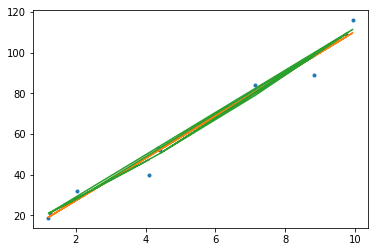

In [9]:
pl.plot(x, y, '.')
pl.plot(x, lm1.predict())
pl.plot(x, lm2.predict())

In [10]:
df_quad = pd.DataFrame({'x': x, 'y': y, 'x2': x*x})
df_quad.head()

,x,x2,y
0,4.097084,16.786099,39.957854
1,1.221488,1.492033,18.795761
2,2.030101,4.121309,31.830380
3,9.736231,94.794196,109.146324
4,7.141747,51.004544,84.117394


In [11]:
lm3 = smf.ols(formula='y ~ x2 + x', data=df_quad).fit()
lm3.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     184.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           8.86e-07
Time:                        11:08:31   Log-Likelihood:                -29.496
No. Observations:                  10   AIC:                             64.99
Df Residuals:                       7   BIC:                             65.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.8114      5.951      1.817      0.112        -3.261    24.884
x2             0.2081      0.234      0.891      0.403        -0.344     0.761
x              8.0695      2.677      3.015      0.020         1.740    14.399
==============================================================================
Omnibus:                        2.031   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.286
Skew:                          -0.815   Prob(JB):                        0.526
Kurtosis:                       2.347   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

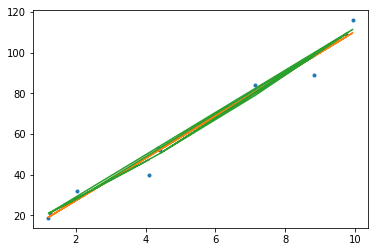

In [12]:
pl.plot(x, y, '.')
pl.plot(x, lm1.predict())
pl.plot(x, lm3.predict())

The simpler model goes to the numerator, the more complex one goes to the denominator.

Since we already have the log likelihood values, we only have to subtract the numerator by the denominator.

In [16]:
## LR = -2 * (log likelihood of the simpler model - log likelihood of the complex model)

The null hypothesis is that the simpler model is better than the more complex model.

The critical value for the chi-square distribution at DOF = 1 at 5% significance level is 3.84.

Since our value is smaller than the critical value, we cannot reject the null hypothesis of the Likelihood Ratio Test.

In [14]:
## THIS IS WRONG!!! 
## If the DOF is negative then it's wrong!!!
lm1.compare_lr_test(lm3)

(-1.0737347737547793, nan, -1.0)

In [15]:
lm3.compare_lr_test(lm1)

(1.0737347737547793, 0.30010337010171195, 1.0)